In [ ]:
!pip install tensorflow==2.6.0
import tensorflow as tf
print(tf.__version__)

In [ ]:
!pip install tensorflow==2.6.0 keras==2.6.0

In [1]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, ZeroPadding2D, add, AveragePooling2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.models import Model

def identity_block(X, f, filters):
    F1, F2 = filters
    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)

    X = add([X, X_shortcut])
    X = Activation('relu')(X)

    return X

def convolutional_block(X, f, filters, s=2):
    F1, F2 = filters
    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(f, f), strides=(s, s), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)

    X_shortcut = Conv2D(filters=F2, kernel_size=(1, 1), strides=(s, s), padding='valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis=3)(X_shortcut)

    X = add([X, X_shortcut])
    X = Activation('relu')(X)

    return X

def ResNet34(input_shape=(224, 224, 3), classes=10):
    X_input = Input(input_shape)
    
    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPool2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64], s=1)
    X = identity_block(X, 3, [64, 64])
    X = identity_block(X, 3, [64, 64])

    X = convolutional_block(X, f=3, filters=[128, 128], s=2)
    X = identity_block(X, 3, [128, 128])
    X = identity_block(X, 3, [128, 128])
    X = identity_block(X, 3, [128, 128])

    X = convolutional_block(X, f=3, filters=[256, 256], s=2)
    X = identity_block(X, 3, [256, 256])
    X = identity_block(X, 3, [256, 256])
    X = identity_block(X, 3, [256, 256])
    X = identity_block(X, 3, [256, 256])
    X = identity_block(X, 3, [256, 256])

    X = convolutional_block(X, f=3, filters=[512, 512], s=2)
    X = identity_block(X, 3, [512, 512])
    X = identity_block(X, 3, [512, 512])

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    X = Flatten()(X)
    X = layers.Dropout(0.5)(x)
    X = layers.Dense(512, activation='relu')(x)
    X = layers.Dropout(0.5)(x)
    output = layers.Dense(classes, activation='softmax')(x)

    model = Model(inputs=X_input, outputs=X)

    return model

model = ResNet34(input_shape=(img_size[0], img_size[1], img_channel), classes=10)

NameError: ignored

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import metrics
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, ZeroPadding2D, add, AveragePooling2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.models import Model

def identity_block(X, f, filters):
    F1, F2 = filters
    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)

    X = add([X, X_shortcut])
    X = Activation('relu')(X)

    return X

def convolutional_block(X, f, filters, s=2):
    F1, F2 = filters
    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(f, f), strides=(s, s), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)

    X_shortcut = Conv2D(filters=F2, kernel_size=(1, 1), strides=(s, s), padding='valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis=3)(X_shortcut)

    X = add([X, X_shortcut])
    X = Activation('relu')(X)

    return X

def ResNet34(input_shape=(224, 224, 3), classes=10):
    X_input = Input(input_shape)
    
    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPool2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64], s=1)
    X = identity_block(X, 3, [64, 64])
    X = identity_block(X, 3, [64, 64])

    X = convolutional_block(X, f=3, filters=[128, 128], s=2)
    X = identity_block(X, 3, [128, 128])
    X = identity_block(X, 3, [128, 128])
    X = identity_block(X, 3, [128, 128])

    X = convolutional_block(X, f=3, filters=[256, 256], s=2)
    X = identity_block(X, 3, [256, 256])
    X = identity_block(X, 3, [256, 256])
    X = identity_block(X, 3, [256, 256])
    X = identity_block(X, 3, [256, 256])
    X = identity_block(X, 3, [256, 256])

    X = convolutional_block(X, f=3, filters=[512, 512], s=2)
    X = identity_block(X, 3, [512, 512])
    X = identity_block(X, 3, [512, 512])

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    X = Flatten()(X)
    X = layers.Dropout(0.5)(X)
    X = layers.Dense(512, activation='relu')(X)
    X = layers.Dropout(0.5)(X)
    output = layers.Dense(classes, activation='softmax')(X)

    model = Model(inputs=X_input, outputs=output)

    return model

# 데이터 경로
train_dir = '/content/drive/MyDrive/data_DE_10Class_1080/train'
val_dir = '/content/drive/MyDrive/data_DE_10Class_1080/val'

# 이미지 크기 및 채널
img_size = (224, 224)
img_channel = 3

# 이미지 데이터 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    zoom_range=0.2,
    shear_range=10,
    channel_shift_range=50,
    brightness_range=(0.8,1.8),
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

# ResNet50 모델 불러오기
resnet = ResNet34(input_shape=(img_size[0], img_size[1], img_channel), classes=10) # 직접 구현한 ResNet34 모델 사용

# 모델 컴파일
resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

# 스케줄러 함수 정의
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# 학습률 스케줄링 콜백 설정
lr_scheduler = LearningRateScheduler(scheduler)

# 체크포인트를 저장할 경로
checkpoint_filepath = '/content/drive/MyDrive/checkpoint/model-{epoch:03d}.h5'

# 체크포인트 콜백 설정
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True, # 가장 성능이 좋은 가중치 저장 여부
    save_weights_only=True, # 모델, 가중치 저장 선택
    verbose=1)

# 조기 종료 콜백 설정
#early_stopping_callback = EarlyStopping(
#    monitor='val_loss',
#    patience=5, # val_loss가 최소 5 epoch 동안 개선되지 않으면 학습 중단
#    restore_best_weights=True) # 가장 성능이 좋은 가중치 복원 여부

# 모델 학습
history = resnet.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=30,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_callback, lr_scheduler])

Found 6698 images belonging to 10 classes.
Found 1942 images belonging to 10 classes.
Epoch 1/30
419/419 [==============================] - ETA: 0s - loss: 3.1473 - accuracy: 0.1241 - precision_2: 0.1165 - recall_2: 0.0069
Epoch 1: val_loss improved from inf to 2.26876, saving model to /content/drive/MyDrive/checkpoint/model-001.h5
419/419 [==============================] - 4549s 11s/step - loss: 3.1473 - accuracy: 0.1241 - precision_2: 0.1165 - recall_2: 0.0069 - val_loss: 2.2688 - val_accuracy: 0.1231 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - lr: 0.0010
Epoch 2/30
419/419 [==============================] - ETA: 0s - loss: 2.2503 - accuracy: 0.1324 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2: val_loss improved from 2.26876 to 2.23940, saving model to /content/drive/MyDrive/checkpoint/model-002.h5
419/419 [==============================] - 225s 538ms/step - loss: 2.2503 - accuracy: 0.1324 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 2.2394 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import metrics
import tensorflow as tf

# 데이터 경로
train_dir = '/content/drive/MyDrive/data_all/train'
val_dir = '/content/drive/MyDrive/data_all/val'

# 이미지 크기 및 채널
img_size = (224, 224)
img_channel = 3

# 이미지 데이터 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    zoom_range=0.2,
    shear_range=10,
    channel_shift_range=50,
    brightness_range=(0.8,1.8),
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

# ResNet50 모델 불러오기
resnet = ResNet50(input_shape=(img_size[0], img_size[1], img_channel), weights=None, include_top=False)

# 새로운 분류층 추가
x = resnet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(16, activation='softmax')(x) # 클래스 개수만큼 조정

model = models.Model(inputs=resnet.input, outputs=predictions)

# 옵티마이저 생성
optimizer = tf.keras.optimizers.Adam(learning_rate=1.6530e-04)

# 이전에 저장된 모델 가중치 불러오기
model.load_weights('/content/drive/MyDrive/checkpoint/checkpoints/model-028.h5') # 경로 작성

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

# 스케줄러 함수 정의
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# 학습률 스케줄링 콜백 설정
lr_scheduler = LearningRateScheduler(scheduler)

# 체크포인트를 저장할 경로
checkpoint_filepath = '/content/drive/MyDrive/checkpoint/checkpoints/model-{epoch:03d}.h5'

# 체크포인트 콜백 설정
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True, # 가장 성능이 좋은 가중치 저장 여부
    save_weights_only=True, # 모델, 가중치 저장 선택
    verbose=1)

# 학습 이어서 시작
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=30,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_callback, lr_scheduler],
          initial_epoch=28) # initial_epoch = 이전에 중단된 epoch 숫자

In [ ]:
import matplotlib.pyplot as plt

val_accuracy = [0.0633, 0.1247, 0.0937, 0.5093, 0.7972, 0.9871, 0.7835, 0.8470, 0.9924, 0.8866, 0.5740, 0.9976, 0.9429, 0.9992, 0.9994, 0.9139, 0.9973, 0.9988, 0.9433, 0.9935, 0.9976, 0.9994, 0.9802, 0.9994, 0.9994, 0.9992, 0.9863, 0.9994, 0.9998, 0.9998]
val_loss = [2.7814, 5.4298, 17.4214, 1.4944, 0.8378, 0.0323, 0.9265, 0.7361, 0.0292, 0.3111, 1.6086, 0.0085, 0.2497, 0.0032, 0.0057, 0.3580, 0.0085, 0.0061, 0.1761, 0.0235, 0.0067, 0.0017, 0.0843, 8.9025e-04, 8.8536e-04, 9.5349e-04, 0.0566, 7.5358e-04, 6.9298e-04, 4.2381e-04]

# 정확도 그래프
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1)
plt.show()

# 손실 그래프
plt.plot(val_loss, label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 2)
plt.show()

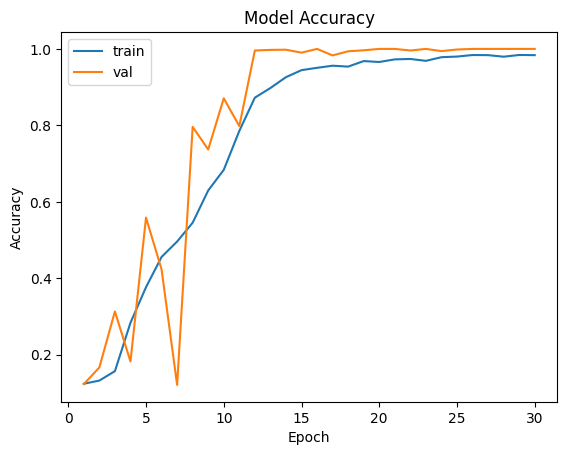

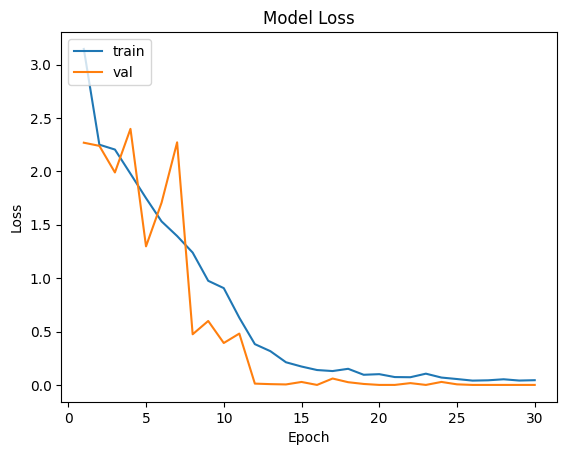

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 학습 곡선 그리기
num_epochs = len(history.history['accuracy'])
epoch_range = np.arange(1, num_epochs + 1)

plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 학습 곡선 그리기
num_epochs = len(history.history['accuracy'])
epoch_range = np.arange(1, num_epochs + 1)

plt.figure(figsize=(10, 5))
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epoch_range, history.history['precision'])
plt.plot(epoch_range, history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epoch_range, history.history['recall'])
plt.plot(epoch_range, history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
# 구글 드라이브에 모델 저장
resnet.save('/content/drive/MyDrive/ResNet34_data_DE_10Class_1080.h5')

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# 전체 데이터 세트 중 테스트 데이터 폴더 경로
test_dir = '/content/drive/MyDrive/data_DE_10Class_1080/test'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet34_data_DE_10Class_1080.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))

Found 1090 images belonging to 10 classes.
1090/1090 [==============================] - 634s 581ms/step
테스트 결과
---------------------
back/back_left_D0.jpg : back
back/back_left_D10.jpg : back
back/back_left_D100.jpg : back
back/back_left_D108.jpg : back
back/back_left_D118.jpg : back
back/back_left_D140.jpg : back
back/back_left_D146.jpg : back
back/back_left_D151.jpg : back
back/back_left_D154.jpg : back
back/back_left_D17.jpg : back
back/back_left_D171.jpg : back
back/back_left_D18.jpg : back
back/back_left_D19.jpg : back
back/back_left_D191.jpg : back
back/back_left_D196.jpg : back
back/back_left_D2.jpg : back
back/back_left_D208.jpg : back
back/back_left_D217.jpg : back
back/back_left_D260.jpg : back
back/back_left_D275.jpg : back
back/back_left_D310.jpg : back
back/back_left_D319.jpg : back
back/back_left_D45.jpg : back
back/back_left_D46.jpg : back
back/back_left_D48.jpg : back
back/back_left_D5.jpg : back
back/back_left_D53.jpg : back
back/back_left_D62.jpg : back
back/back_left

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# ABC 테스트 데이터 세트 폴더 경로
test_dir = '/content/drive/MyDrive/data_ABC_10Class_1080/test'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet34_data_DE_10Class_1080.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))

# Confusion Matrix and Classification Report
cm = confusion_matrix(true_labels, y_pred)
print('Confusion Matrix')
print(cm)

# 각 클래스별 정밀도, 재현율, F1-score, 그리고 지지도(support, 샘플 수)를 계산
cr = classification_report(true_labels, y_pred, target_names=class_labels)
print('Classification Report')
print(cr)

Found 2567 images belonging to 10 classes.
2567/2567 [==============================] - 1563s 609ms/step
테스트 결과
---------------------
back/back_left103.jpg : back_left
back/back_left1182.jpg : back
back/back_left1183.jpg : back
back/back_left1184.jpg : back
back/back_left1185.jpg : back
back/back_left1186.jpg : back
back/back_left1187.jpg : back
back/back_left1188.jpg : back
back/back_left1189.jpg : back
back/back_left1190.jpg : back
back/back_left1191.jpg : back
back/back_left1192.jpg : back
back/back_left1193.jpg : back
back/back_left1194.jpg : back
back/back_left1195.jpg : back
back/back_left1196.jpg : back
back/back_left1197.jpg : back
back/back_left1198.jpg : back
back/back_left1199.jpg : back
back/back_left120.jpg : back_left
back/back_left1200.jpg : back
back/back_left1201.jpg : back
back/back_left1202.jpg : back
back/back_left1203.jpg : back
back/back_left1204.jpg : back
back/back_left1205.jpg : back
back/back_left1206.jpg : back
back/back_left1207.jpg : back
back/back_left1208

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# BC 테스트 데이터 세트 폴더 경로
test_dir = '/content/drive/MyDrive/data_BC_10Class_1080/test'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet34_data_DE_10Class_1080.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))

# Confusion Matrix and Classification Report
cm = confusion_matrix(true_labels, y_pred)
print('Confusion Matrix')
print(cm)

# 각 클래스별 정밀도, 재현율, F1-score, 그리고 지지도(support, 샘플 수)를 계산
cr = classification_report(true_labels, y_pred, target_names=class_labels)
print('Classification Report')
print(cr)

Found 1309 images belonging to 10 classes.
1309/1309 [==============================] - 592s 452ms/step
테스트 결과
---------------------
back/back_left1182.jpg : back
back/back_left1183.jpg : back
back/back_left1184.jpg : back
back/back_left1185.jpg : back
back/back_left1186.jpg : back
back/back_left1187.jpg : back
back/back_left1188.jpg : back
back/back_left1189.jpg : back
back/back_left1190.jpg : back
back/back_left1191.jpg : back
back/back_left1192.jpg : back
back/back_left1193.jpg : back
back/back_left1194.jpg : back
back/back_left1195.jpg : back
back/back_left1196.jpg : back
back/back_left1197.jpg : back
back/back_left1198.jpg : back
back/back_left1199.jpg : back
back/back_left1200.jpg : back
back/back_left1201.jpg : back
back/back_left1202.jpg : back
back/back_left1203.jpg : back
back/back_left1204.jpg : back
back/back_left1205.jpg : back
back/back_left1206.jpg : back
back/back_left1207.jpg : back
back/back_left1208.jpg : back
back/back_left1209.jpg : back_hurray
back/back_left1210.j

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# 4월에 찍은 테스트 데이터 폴더 경로
test_dir = '/content/drive/MyDrive/testdata'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet50_data_BCD_10Class.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# D 테스트 데이터 폴더 경로
test_dir = '/content/drive/MyDrive/testdata_D'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet50_data_BCD_10Class.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))